In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing 
import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve

In [3]:
path = "C:\\Users\\Admin\\Desktop\\durga\\Newdatasets\\mushroom classification\\mushrooms.csv"
data = pd.read_csv(path)
print(data)

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n

In [4]:
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [5]:
data.shape

(8124, 23)

In [6]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

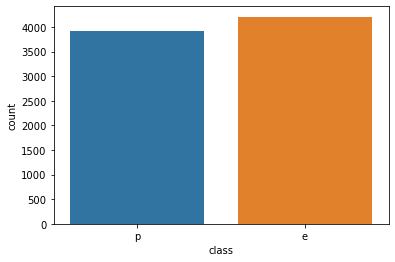

In [7]:
sns.countplot(data["class"])

<AxesSubplot:>

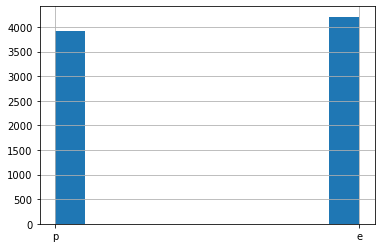

In [8]:
data['class'].hist()

In [9]:
data['gill-size' ].value_counts()

b    5612
n    2512
Name: gill-size, dtype: int64

In [10]:
labelencoder = LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [11]:
data['stalk-shape'  ].value_counts()

1    4608
0    3516
Name: stalk-shape, dtype: int64

In [12]:
data.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

In [13]:
data['stalk-root'].value_counts()

1    3776
0    2480
3    1120
2     556
4     192
Name: stalk-root, dtype: int64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]),
 [Text(0, 0.5, 'class'),
  Text(0, 1.5, 'cap-shape'),
  Text(0, 2.5, 'cap-surface'),
  Text(0, 3.5, 'cap-color'),
  Text(0, 4.5, 'bruises'),
  Text(0, 5.5, 'odor'),
  Text(0, 6.5, 'gill-attachment'),
  Text(0, 7.5, 'gill-spacing'),
  Text(0, 8.5, 'gill-size'),
  Text(0, 9.5, 'gill-color'),
  Text(0, 10.5, 'stalk-shape'),
  Text(0, 11.5, 'stalk-root'),
  Text(0, 12.5, 'stalk-surface-above-ring'),
  Text(0, 13.5, 'stalk-surface-below-ring'),
  Text(0, 14.5, 'stalk-color-above-ring'),
  Text(0, 15.5, 'stalk-color-below-ring'),
  Text(0, 16.5, 'veil-type'),
  Text(0, 17.5, 'veil-color'),
  Text(0, 18.5, 'ring-number'),
  Text(0, 19.5, 'ring-type'),
  Text(0, 20.5, 'spore-print-color'),
  Text(0, 21.5, 'population'),
  Text(0, 22.5, 'habitat')])

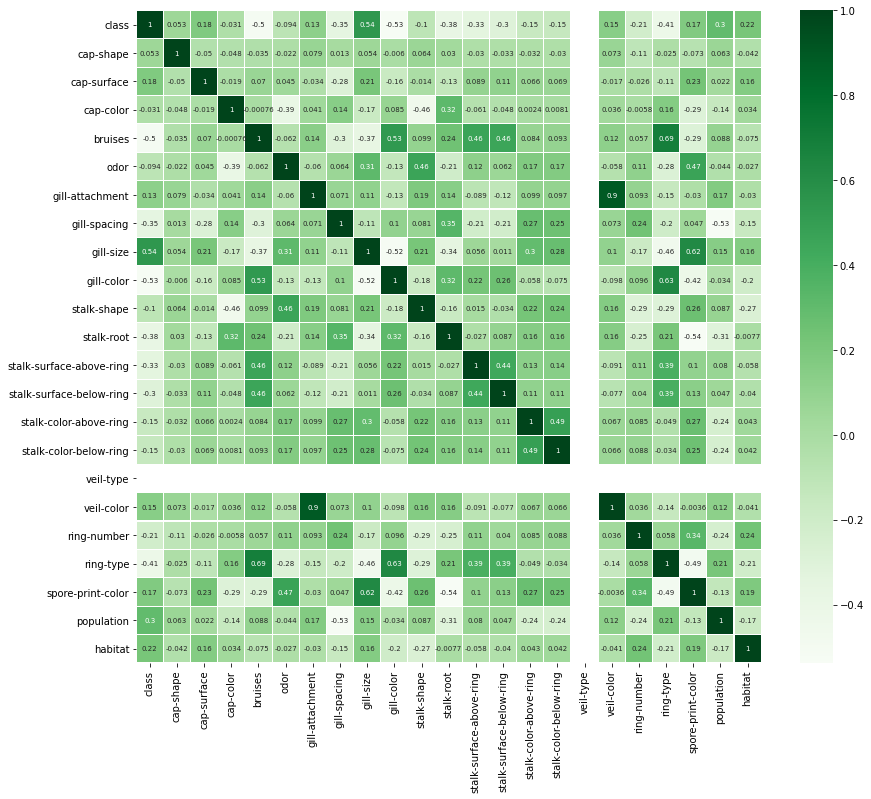

In [14]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="Greens",annot=True,annot_kws={"size":7})
plt.yticks(rotation=0)

In [15]:
data[['class','gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class')

gill-color     class
1            1  0.000000
6            6  0.000000
9            9  0.097561
5            5  0.106870
4            4  0.156863
10          10  0.204659
11          11  0.255814
7            7  0.428954
2            2  0.670213
3            3  0.721311
0            0  1.000000
8            8  1.000000

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'habitat'

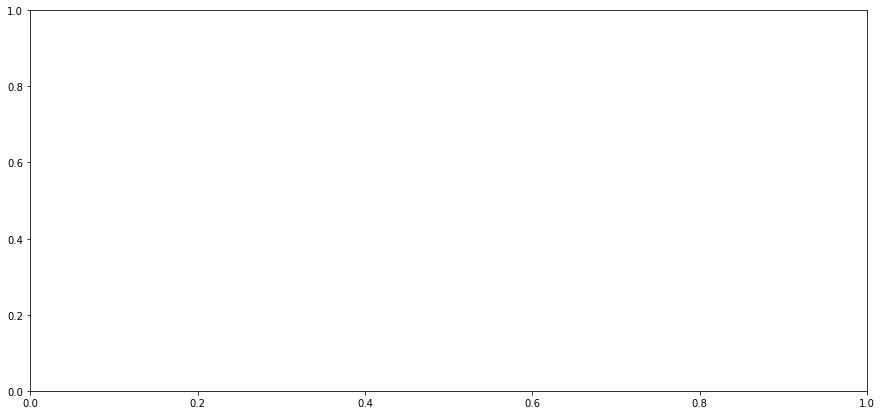

In [17]:
columns = data.columns.values
for column in columns:
    print("{0}:{1}".format(column,data[column].unique()))
    
print("\n there are{} '?' values in the feature 'stalk-root',".format(data[data["stalk-root"] == "?"]["stalk-root"].count))

class:[1 0]
cap-shape:[5 0 4 2 3 1]
cap-surface:[2 3 0 1]
cap-color:[4 9 8 3 2 5 0 7 1 6]
bruises:[1 0]
odor:[6 0 3 5 2 1 8 7 4]
gill-attachment:[1 0]
gill-spacing:[0 1]
gill-size:[1 0]
gill-color:[ 4  5  2  7 10  3  9  1  0  8 11  6]
stalk-shape:[0 1]
stalk-root:[3 2 1 4 0]
stalk-surface-above-ring:[2 0 1 3]
stalk-surface-below-ring:[2 0 3 1]
stalk-color-above-ring:[7 3 6 4 0 2 5 1 8]
stalk-color-below-ring:[7 6 3 0 4 2 8 5 1]
veil-type:[0]
veil-color:[2 0 1 3]
ring-number:[1 2 0]
ring-type:[4 0 2 1 3]
spore-print-color:[2 3 6 1 7 5 4 8 0]
population:[3 2 0 4 5 1]
habitat:[5 1 3 0 4 6 2]

 there are<bound method Series.count of Series([], Name: stalk-root, dtype: int32)> '?' values in the feature 'stalk-root',


In [18]:
x= data.drop("class",axis =1)
y = data['class']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.1)

In [19]:
x_train.head()

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
4750          2            0          9        0     2                1   
3026          5            0          5        0     1                1   
3757          2            0          2        1     5                1   
6167          2            2          2        0     8                1   
6281          5            2          2        0     8                1   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
4750             0          0           2            0  ...   
3026             1          1           9            0  ...   
3757             0          0           5            1  ...   
6167             0          1           0            1  ...   
6281             0          1           0            1  ...   

      stalk-surface-below-ring  stalk-color-above-ring  \
4750                         1                       6   
3026                         2                       7   
3757                         2                       3   
6167                         1                       6   
6281                         2                       6   

      stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  \
4750                       0          0           2            1          2   
3026                       7          0           2            1          4   
3757                       3          0           2            1          4   
6167                       7          0           2            1          0   
6281                       7          0           2            1          0   

      spore-print-color  population  habitat  
4750                  1           4        0  
3026                  2           3        0  
3757                  2           4        0  
6167                  7           4        4  
6281                  7           4        2  

[5 rows x 22 columns]

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

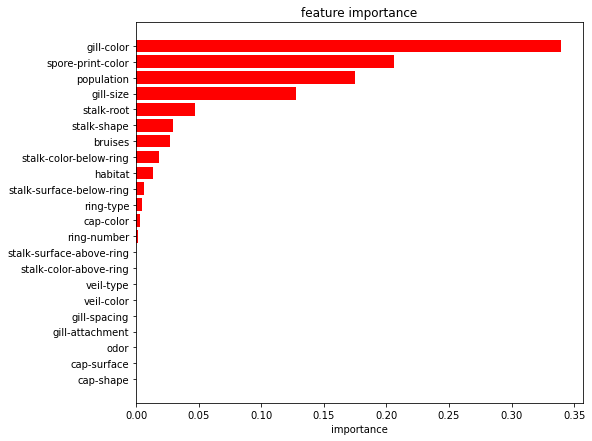

In [21]:
features_list = x.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))

plt.barh(range(len(sorted_idx)),feature_importance[sorted_idx],align='center',color="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('importance')
plt.title('feature importance')
plt.draw()
plt.show()

In [22]:
y_pred_dt = dt.predict(x_test)
print("Decision tree classifier report:\n\n", classification_report(y_test,y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(x_test,y_test)*100,2)))

Decision tree classifier report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%


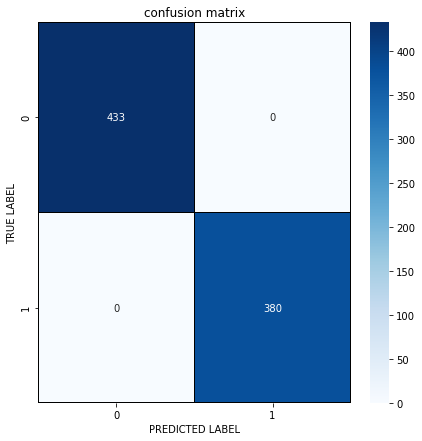

In [23]:
#confusion matrix for Decision tree classifier
cm = confusion_matrix(y_test,y_pred_dt)

x_axis_labels = ["Edible","poisonous"]
y_axis_labels = ["Edible","poisonous"]

f, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm,annot = True, linewidth=0.2,linecolor="black",fmt = ".0f",ax=ax, cmap="Blues",)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('confusion matrix')
plt.show()

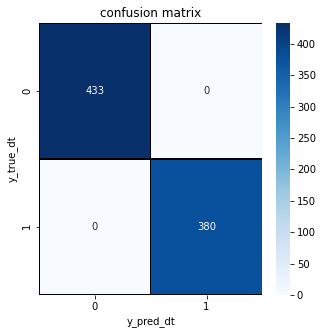

In [24]:
y_pred_dt= dt.predict(x_test)
y_true_dt= y_test
cm = confusion_matrix(y_test,y_pred_dt)


f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True, linewidth=0.2,linecolor="black",fmt = ".0f",ax=ax, cmap="Blues",)
plt.xlabel("y_pred_dt")
plt.ylabel("y_true_dt")
plt.title('confusion matrix')
plt.show()